# Train Deep Learning Model

# Step-1 Load the preprocess data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
#load the preprocessed data
data= np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [6]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

# Preprocessing "y"

In [7]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [22]:
y_array = y_onehot.toarray()

In [24]:
y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# Split the data into Train and Test sets

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_array, test_size=0.2, random_state=42) 

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

# Deep Learning Model

In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [32]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])

# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [34]:
# Training CNN
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=30, epochs=10)

Epoch 1/10
266/266 [==============================] - 83s 303ms/step - loss: 0.2108 - accuracy: 0.9205 - val_loss: 0.0828 - val_accuracy: 0.9779
Epoch 2/10
266/266 [==============================] - 87s 325ms/step - loss: 0.0631 - accuracy: 0.9770 - val_loss: 0.0945 - val_accuracy: 0.9659
Epoch 3/10
266/266 [==============================] - 94s 353ms/step - loss: 0.0443 - accuracy: 0.9847 - val_loss: 0.0447 - val_accuracy: 0.9819
Epoch 4/10
266/266 [==============================] - 94s 355ms/step - loss: 0.0342 - accuracy: 0.9878 - val_loss: 0.0424 - val_accuracy: 0.9849
Epoch 5/10
266/266 [==============================] - 104s 392ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0533 - val_accuracy: 0.9829
Epoch 6/10
266/266 [==============================] - 88s 331ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0730 - val_accuracy: 0.9819
Epoch 7/10
266/266 [==============================] - 89s 335ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0559 - val_a

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
history_df = pd.DataFrame(history.history)

In [37]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.210805,0.920547,0.082839,0.977912
1,0.063115,0.977030,0.094463,0.965863
2,0.044286,0.984687,0.044671,0.981928
3,0.034231,0.987825,0.042360,0.984940
4,0.021129,0.993724,0.053264,0.982932
5,0.020416,0.993724,0.072951,0.981928
6,0.014728,0.995481,0.055875,0.982932
7,0.004478,0.998870,0.049852,0.986948
8,0.001413,0.999749,0.072447,0.987952
9,0.000196,1.000000,0.065440,0.987450


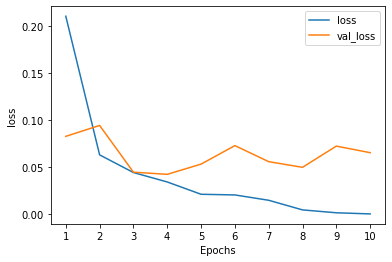

In [38]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

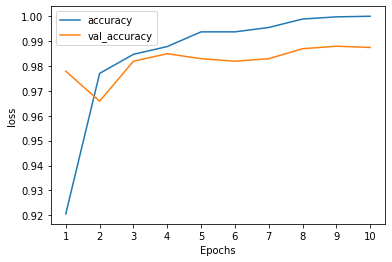

In [39]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [40]:
# Save CNN Model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets
